In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk

In [2]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [3]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 1000)
    plt.xlim(0,1,0.1)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

 # Twitter sexism linear word oh

AUC score 0.9149463431011682


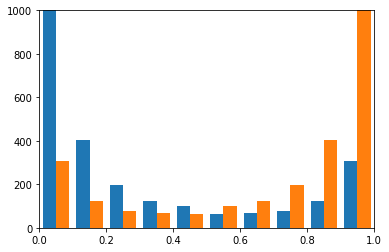

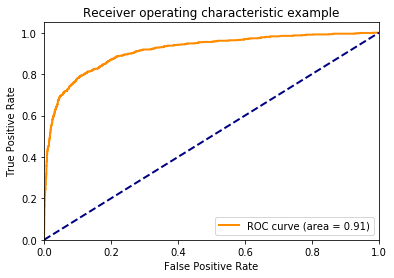

AUC score 0.7982637765776684
CM 2771 99 314 537
F1-score 0.722259583053127
imbalanced_accuracy_score 0.889008331093792


In [4]:
 report_results("linear_word_oh_Twitter_sexism_prediction_results.csv")

# Twitter sexism linear char oh

AUC score 0.8971708785110561


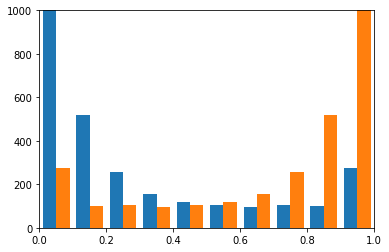

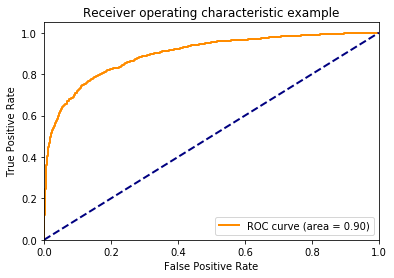

AUC score 0.7892754762952406
CM 2726 147 314 534
F1-score 0.6984957488554611
imbalanced_accuracy_score 0.8761085729642569


In [5]:
 report_results("linear_char_oh_Twitter_sexism_prediction_results.csv")

# Twitter sexism mlp word oh

AUC score 0.8490305188640683


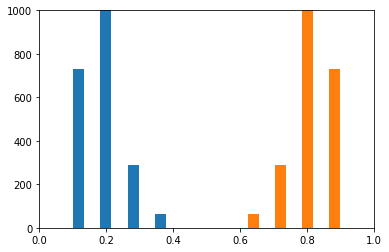

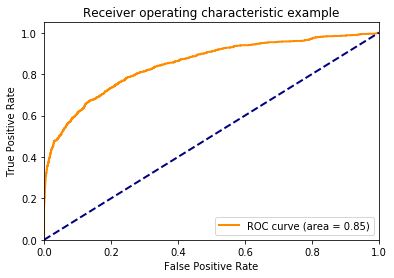

AUC score 0.5
CM 2892 0 829 0
F1-score 0.0
imbalanced_accuracy_score 0.7772104273044881


In [6]:
 report_results("mlp_word_oh_Twitter_sexism_prediction_results.csv")

# Twitter sexism mlp char oh

AUC score 0.8248817447976704


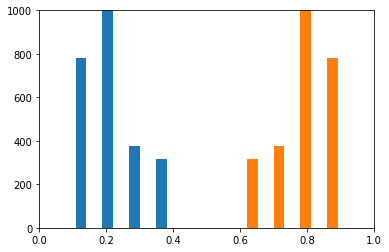

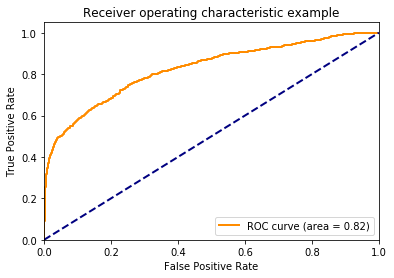

AUC score 0.5
CM 2868 0 853 0
F1-score 0.0
imbalanced_accuracy_score 0.7707605482397205


In [7]:
 report_results("mlp_char_oh_Twitter_sexism_prediction_results.csv")

# lstm twitter sexism word

AUC score 0.896287590341287


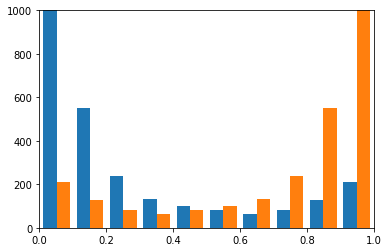

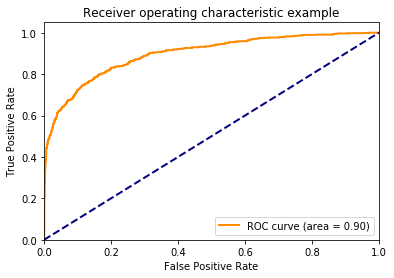

AUC score 0.7673912333753669
CM 2783 83 373 482
F1-score 0.6788732394366197
imbalanced_accuracy_score 0.8774522977694168


In [9]:
 report_results("lstm_word_oh_Twitter_sexism_prediction_results.csv")

# lstm twitter sexism char

AUC score 0.6373980144530917


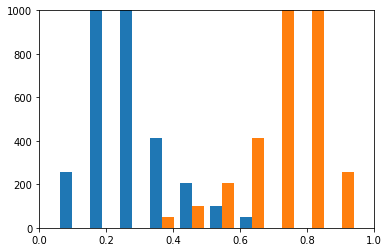

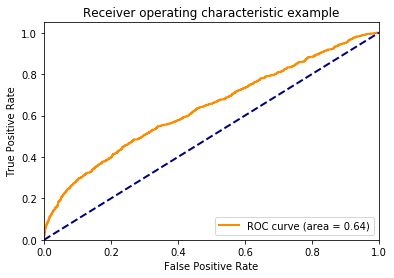

AUC score 0.5488165180077867
CM 2825 54 744 98
F1-score 0.19718309859154928
imbalanced_accuracy_score 0.7855415210964795


In [10]:
 report_results("lstm_char_oh_Twitter_sexism_prediction_results.csv")

# conv_lstm twitter sexism word

AUC score 0.905507576128264


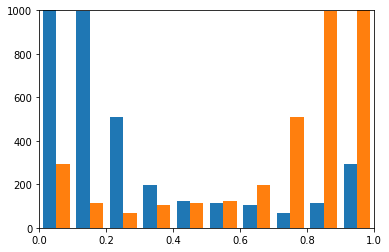

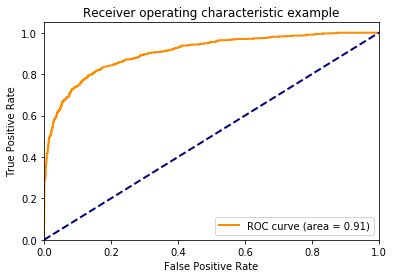

AUC score 0.7953116080311853
CM 2723 142 308 548
F1-score 0.7089262613195343
imbalanced_accuracy_score 0.8790647675356087


In [11]:
 report_results("conv_lstm_word_oh_Twitter_sexism_prediction_results.csv")

# conv_lstm twitter sexism char

AUC score 0.9064342485726489


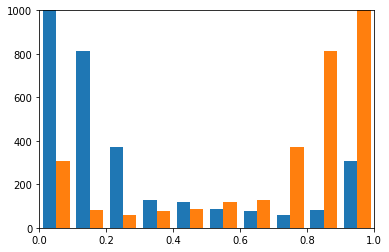

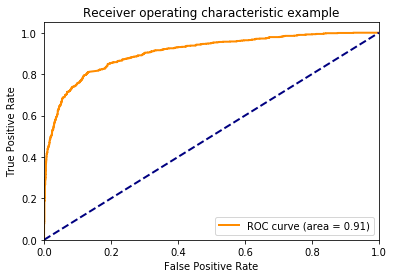

AUC score 0.7786492979019698
CM 2764 105 346 506
F1-score 0.6917293233082706
imbalanced_accuracy_score 0.8787960225745767


In [12]:
 report_results("conv_lstm_char_oh_Twitter_sexism_prediction_results.csv")

In [18]:
twitter_sexism_data = pd.read_csv("../Twitter_sexism_parsed_dataset.csv")

In [19]:
twitter_sexism_data["Text"].head(5)

0    RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...
1     There's some very hate able teams this year #MKR
2    RT @The_Eccles: "Everyone underestimated us" \...
3    RT @NOTLukeDarcy: did @Channel7 or #MKR actual...
4    No, you don't. @Shut_Up_Jeff: I thought of a r...
Name: Text, dtype: object

In [20]:
twitter_sexism_data = twitter_sexism_data.dropna()

In [21]:
twitter_sexism_data = twitter_sexism_data.dropna()
print(len(twitter_sexism_data))
len(twitter_sexism_data[twitter_sexism_data["oh_label"] == 1])/len(twitter_sexism_data)

14878


0.22697943271945153

In [16]:
len(twitter_sexism_data[twitter_sexism_data["oh_label"] == 1])

3377

In [17]:
len(twitter_sexism_data[twitter_sexism_data["oh_label"] == 0])

11501

In [17]:
#avergae number of words per post
twitter_sexism_data["No words"] = twitter_sexism_data["Text"].apply(lambda x : return_no_words(str(x)))

In [18]:
np.mean(twitter_sexism_data["No words"] )

19.58215173711444

In [19]:
np.std(twitter_sexism_data["No words"] )

8.039691451371063

In [20]:
np.var(twitter_sexism_data["No words"] )

64.63663863324895

(0, 50)

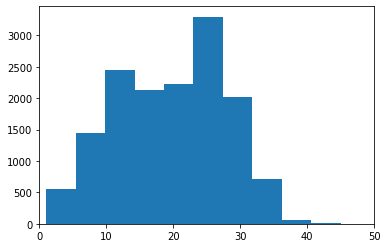

In [21]:
plt.hist(twitter_sexism_data["No words"])
plt.xlim(0,50)